# **Google Colab**

For this TensorFlow Tutorial, the idea is to use a system that we can use online, for no need of installation for software and other programs. That's why, we present the Google Colab. It allows users to write and execute Python code through the browser, especially suited for Machine Learning, Data Analysis, and education. Google Colab provides an online integrated development environment (IDE) for Python that requires no setup and runs entirely in the cloud. Google Colab has been one of the easiest ways to start programming in Python and build ML (Machine Learning) or DL (Deep Learning) models. Colab provides free cloud services and Jupyter Notebooks that support free GPUs. Colab also allows users to develop ML/DL applications or simply to learn Python.

### Google Drive Setup & Connection


In [3]:
# We connect Google Colab to Google Drive, to ensure your notebook (the .ipynb file) is saved and accessible at any time for future use or download
from google.colab import drive
drive.mount('/content/gdrive')
# You can create the folder directly in Colab using the command below; you can change the folder -  ex.: '/content/gdrive/MyDrive/Project_1'
!mkdir -p '/content/gdrive/MyDrive/TF_Project'
print("Folder created successfully")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Folder created successfully


Once your project folder is created in Google Drive, you must take the downloaded file, TFbasics.zip, unzip it, and place its contents (the extracted files) inside this new folder.
The files you need to import are:

*   callbackPlots.py
*   CNN_FullyConnected.png
*   example_accuracy_plot.pdf
*   graph_example.png
*   MNIST_cnn_functions.py
*   MNIST.png
*   model_Accu0.7150.keras
*   model_Accu0.9653.keras
*   model_architecture.png
*   nonlinear_activation_functions.png




In [4]:
# Add the path for the Python code for your project folder
import sys
sys.path.append('/content/gdrive/MyDrive/TF_Project')

In [5]:
# Connect the Matplotlib library to visualize images in the model from the your folder
from IPython.display import Image
import matplotlib
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Liberation Sans']
matplotlib.rcParams['text.usetex'] = False

To be more fast the traning of the process, we have to change the runtime type. Usually with Googel Colab, they gonna use CPU. Colab provides free cloud services and Jupyter Notebooks that support free GPUs, so we can use for the traning de models

So you need to do:

Connec -> Change runtime type

Select **T4 GPU**

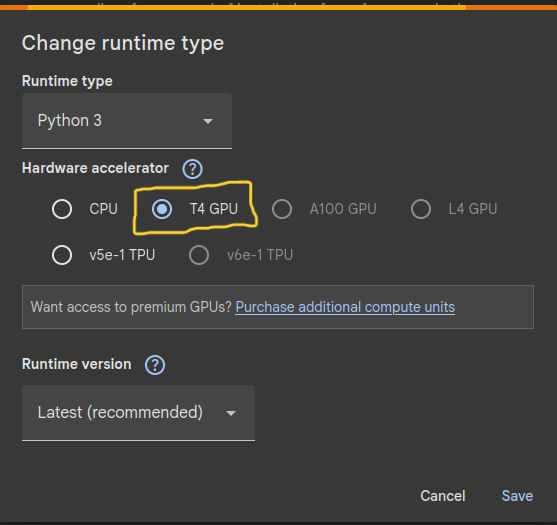

# **Tutorial TensorFlow**

## Learning TensorFlow with Hope,2017

Following notebook is based in the bibliography:

T. Hope, Y. S. Resheff, and I. Lieder, Learning TensorFlow: A Guide to Building Deep Learning Systems. Sebastopol, CA: O'Reilly Media, 2017.







### $1^{st}$ Example

In order to print a "Hello World!", we could use the classic Python code for that. When TensorFLow is evoqued the text is now stored as a Tensor in tf object/class.

In [ ]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())
GPU=tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(GPU))
if GPU:
    try:
        for gpu in GPU:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Memory growth set for GPU.")
    except RuntimeError as e:
        print(e)
h = tf.constant("Hello")
w = tf.constant(" World!")
hw = h+w
print(hw.numpy().decode("utf-8"))

Hello World!
Num GPUs Available:  1


### $2^{nd}$ Example

Softmax Regression is a simple classifiers using tf environment. The nomenclature used is often $w_i^j$, where $w$ is a vector; $i$ is the indice of the vector; $j$ is the class that $w$ represents. Finally, $W$ is the database of $[w^a...w^z] \forall j \in [a,...,z]$ avaliable classes. This softmax regression is used to train MNIST benchmark, whgihc has 9 classes as follows. To train a neural network using MNIST data base and using softmax, one may transform the image $[28x28]$ into a flaten vector of $[1 x 784]$. Thus the position of the pixels (black or white) does not matter anymore in the training. Softmax neural network has 9 outputs, one for each class, and they store the probability to the input being from such class. The most probable class must be taken. See figure below:

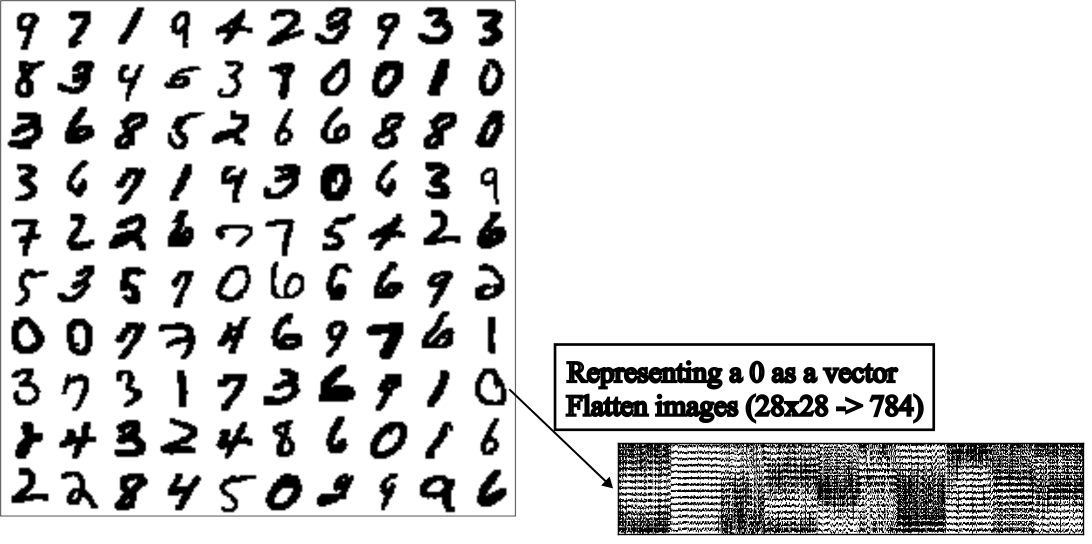

In [5]:
# Configure the path if needed, mainly due to the name of your folder: /content/gdrive/MyDrive/name_folder/MNIST.png
Image('/content/gdrive/MyDrive/TF_Project/MNIST.png', width=700)

For the code above, is a example for a Softmax Regression. Is the most basic and fundamental linear classifier. It uses a single layer of neurons to solve multi-class classification problems, such as the 10 digits in MNIST.

The core component is the Softmax activation function in the output layer. Softmax transforms the model's raw scores into a probability distribution, ensuring the sum of all 10 outputs equals 1.0. The model then predicts the class with the highest probability.

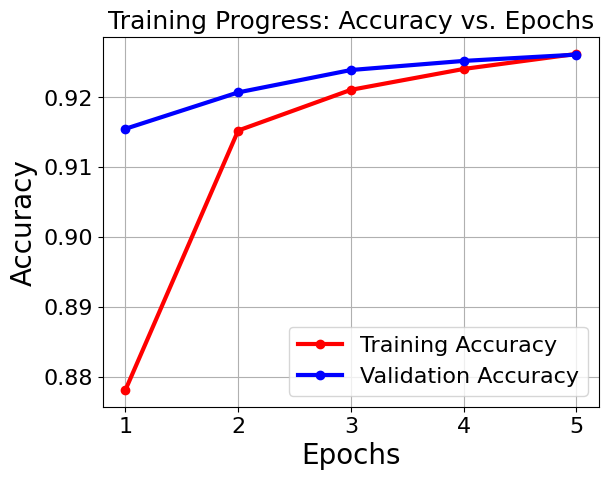

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9260 - loss: 0.2693 - val_accuracy: 0.9261 - val_loss: 0.2677
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9178 - loss: 0.3041
Test accuracy: 0.9261

--- Model Summary (Neurons and Synapses) ---
Layer: dense (Dense), Parameters: 7850, Neurons: 10, Weights: 7840, Bias: 10, Calculated Synapses (Weights + Bias): 7850

Total Neurons (approx, mainly from Dense/RNN): 10
Total Synapses (Total Trainable Parameters): 7850


In [6]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from callbackPlots import AccuracyPlotCallback
from callbackPlots import count_neurons_and_synapses
import numpy as np
import random

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"Training set size: {x_train.shape}, Test set size: {x_test.shape}")

# Flatten images (28x28 -> 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build a simple softmax classifier
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='softmax', input_shape=(784,))
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Create the callback instance
plot_callback = AccuracyPlotCallback()

# Debugging: Print if the callback is created correctly
print(f"Callback created: {plot_callback}")

# Train the model with the callback
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), callbacks=[plot_callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Save the model architecture as a PNG file
plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True, dpi=300)

# Call the function
count_neurons_and_synapses(model)

## Supervised Learning and the Train/Test Scheme

Supervised learning generally refers to the task of learning a function from data objects to labels associated with them, based on a set of examples where the correct labels are already known. This is usually subdivided into the case where labels are continuous (regression) or discrete (classification).

The purpose of training supervised learning models is almost always to apply them later to new examples with unknown labels called inference phase, in order to obtain predicted labels for them. In the MNIST case discussed in this section, the purpose of training the model would probably be to apply it on new handwritten digit images and automatically find out what digits they represent.

As a result, we are interested in the extent to which our model will label new examples correctly. This is reflected in the way we evaluate the accuracy of the model. We first partition the labeled dataset into train and test partitions. During model training, we use only the train partition, and during validation we test the accuracy only on the test partition. This scheme is generally known as a train/test validation.

The actual training of the model, in the stochastic gradient descent (SGD) approach, consists of taking many steps in “the right direction.” The SGD optimizer used in this example is Adam. The cost function used is a cross entropy pre-defined fuction. The metric is the model accuracy, which is plotted during training and validation.

In this example,we learn what is a epoch and a batch_size. To correclty define them, we have found.
An epoch is one full pass over the entire training dataset. The number of epochs affects:

✅ Training Time:

- More epochs = longer training time.
- Too many epochs can lead to overfitting, where the model memorizes the training data instead of generalizing.

✅ Model Performance:

- 5 epochs is often enough for simple datasets like MNIST because the softmax classifier is relatively simple.
- More complex models may require more epochs to learn complex patterns.
- If accuracy is low after 5 epochs, increasing the number of epochs (e.g., 10 or 20) can improve performance.

🚀 How to choose the right number of epochs?
Use early stopping to stop training when the validation accuracy stops improving. Example:
```python
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])
```

The batch size determines how many training samples are processed before updating the model's weights.

✅ Effect on Memory:

- A larger batch size (e.g., 128, 256) requires more GPU/CPU memory but speeds up training.
- A smaller batch size (e.g., 16 or 32) takes longer but uses less memory.

✅ Effect on Model Performance:

- Smaller batch sizes (e.g., 32, 64) → More stable updates, better generalization.
- Larger batch sizes (e.g., 128, 256) → Faster training but may generalize worse.

🚀 How to choose the right batch size?

-  32 or 64 is a good starting point for most problems. <- Golden Number from Rule of Thumb
- If training is slow, increase batch size (but check GPU memory usage).
- If results fluctuate a lot, try smaller batch sizes (e.g., 16).

The result is a neural network model described as:
- Input Layer: 784 neurons (flattened 28×28 images)
- Dense Output Layer: 10 neurons (softmax activation for classification)
- This is a fully connected layer, every input neuron connects to every neuron in the next layer:

$Synapses=Input Neurons×Output Neurons+Bias Terms$

$Synapses=(784×10)+10=7850$

[ Input Layer ] →  [ Dense Layer (784 neurons) ] → [ Output Layer (10 neurons, softmax) ]



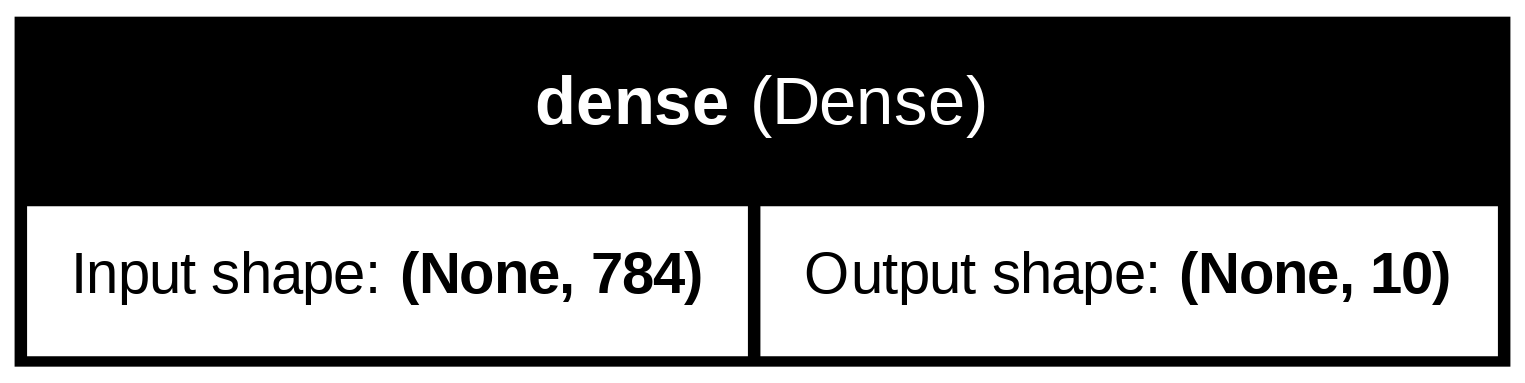

In [ ]:
Image('/content/model_architecture.png', width=700)

## Tensorflow and Graph Computation

Roughly speaking, working with TensorFlow involves two main phases: (1) constructing a graph and (2) executing it. Let’s jump into our first example and create
something very basic.

Graph Operations are described in the following table.

| TensorFlow Operator    | Shortcut    | Description                                                             |
|------------------------|-------------|-------------------------------------------------------------------------|
| tf.add()               | a + b       | Adds a and b, element-wise.                                             |
| tf.multiply()          | a * b       | Multiplies a and b, element-wise.                                       |
| tf.subtract()          | a - b       | Subtracts a from b, element-wise.                                       |
| tf.divide()            | a / b       | Computes Python-style division of a by b.                               |
| tf.pow()               | a ** b      | Returns the result of raising each element in a to its corresponding element b, element-wise. |
| tf.mod()               | a % b       | Returns the element-wise modulo.                                        |
| tf.logical_and()       | a & b       | Returns the truth table of a & b, element-wise. dtype must be tf.bool.  |
| tf.greater()           | a > b       | Returns the truth table of a > b, element-wise.                         |
| tf.greater_equal()     | a >= b      | Returns the truth table of a >= b, element-wise.                        |
| tf.less_equal()        | a <= b      | Returns the truth table of a <= b, element-wise.                        |
| tf.less()              | a < b       | Returns the truth table of a < b, element-wise.                         |
| tf.negative()          | -a          | Returns the negative value of each element in a.                        |
| tf.logical_not()       | ~a          | Returns the logical NOT of each element in a. Only compatible with Tensor objects with dtype of tf.bool. |
| tf.abs()               | abs(a)      | Returns the absolute value of each element in a.                        |
| tf.logical_or()        | a \| b       | Returns the truth table of a | b, element-wise. dtype must be tf.bool.  |


Let's do the graph example illustrated in the figure below

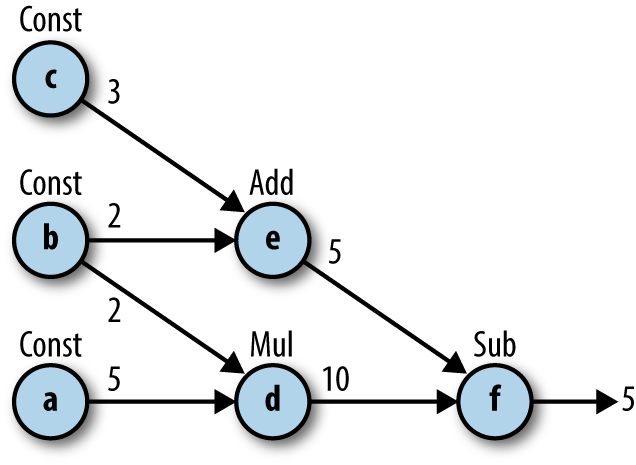

In [7]:
Image('/content/gdrive/MyDrive/TF_Project/graph_example.png', width=700)

The Python code should be this one.

In [8]:
import tensorflow as tf

a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)

d = tf.multiply(a,b)
e = tf.add(c,b)
f = tf.subtract(d,e)

outs = f.numpy()  # To get the value of the tensor in eager execution mode
print("outs = {}".format(outs))

outs = 5


## Tensorflow Basic Functions

In our initial graph example, we request one specific node (node f) by passing the
variable it was assigned to as an argument to the sess.run() method. This argument
is called fetches, corresponding to the elements of the graph we wish to compute.

In TensorFlow 2.x, the concept of graphs is abstracted away as TensorFlow 2.x operates in eager execution by default, and you no longer need to create and manage graphs manually like you did in TensorFlow 1.x. However it is interesting to understand how it works using the graph abstraction. The default behavior is eager execution,  and all operations happen immediately (eagerly), and you don’t need to manage a session or a graph manually. If you still want to use a graph in TensorFlow 2.x, you can enable graph execution by using tf.function, which creates a graph behind the scenes for optimization purposes. Be aware of your code readbility!

Here some comon functions from tensorflow library
| TensorFlow Operation                        | Description |
|---------------------------------------------|-------------|
| `tf.constant(value)`                        | Creates a tensor populated with the specified value(s). |
| `tf.fill(shape, value)`                     | Creates a tensor of shape `shape` and fills it with `value`. |
| `tf.zeros(shape)`                           | Returns a tensor of shape `shape` with all elements set to `0`. |
| `tf.zeros_like(tensor)`                     | Returns a tensor of the same type and shape as `tensor` with all elements set to `0`. |
| `tf.ones(shape)`                            | Returns a tensor of shape `shape` with all elements set to `1`. |
| `tf.ones_like(tensor)`                      | Returns a tensor of the same type and shape as `tensor` with all elements set to `1`. |
| `tf.random_normal(shape, mean, stddev)`     | Outputs random values from a normal distribution. |
| `tf.truncated_normal(shape, mean, stddev)`  | Outputs random values from a truncated normal distribution (values whose magnitude is more than two standard deviations from the mean are dropped and re-picked). |
| `tf.random_uniform(shape, minval, maxval)`  | Generates values from a uniform distribution in the range `[minval, maxval)`. |
| `tf.random_shuffle(tensor)`                 | Randomly shuffles a tensor along its first dimension. |



In [9]:
import tensorflow as tf
#Matrix operation example
A = tf.constant([ [1,2,3],[4,5,6] ])
print(A.get_shape())
x = tf.constant([1,0,1])
print(x.get_shape())
x = tf.expand_dims(x,1)
print(x.get_shape())
b = tf.matmul(A,x)
print("Ax = {}".format(b.numpy()))

(2, 3)
(3,)
(3, 1)
Ax = [[ 4]
 [10]]


**Using `tf.Variable`**

A TensorFlow variable is a tensor that can hold and update state (i.e., its value can change over time). Unlike ```python tf.constant()```, which creates an immutable tensor, ```python tf.Variable``` allows modification. Gradient Tracking for Training: tf.Variable is commonly used in training models because TensorFlow automatically tracks it for gradients, as in
```python
w = tf.Variable(tf.random.normal([3, 3]), trainable=True)
```
Here, ```python trainable=True``` ensures that TensorFlow optimizes the variable during backpropagation.



### $3^{rd}$ Example

In [ ]:
import tensorflow as tf

# Define a variable
x = tf.Variable(10, dtype=tf.int32)

# Print the initial value
print("Initial value:", x.numpy())

# Update the value
x.assign(20)
print("Updated value:", x.numpy())

# Increment by 5
x.assign_add(5)
print("After increment:", x.numpy())

# Decrement by 3
x.assign_sub(3)
print("After decrement:", x.numpy())

#TensorFlow automatically tracks it for gradients, like in synapses weights
w = tf.Variable(tf.random.normal([3, 3]), trainable=True)
print("weights value:", w.numpy())

Initial value: 10
Updated value: 20
After increment: 25
After decrement: 22
weights value: [[ 0.3274685 -0.8426258  0.3194337]
 [-1.4075519 -2.3880599 -1.0392479]
 [-0.5573232  0.539707   1.6994323]]


## Creating Tensorflow Models

TensorFlow, however,has designated built-in structures for feeding input values. These structures are called placeholders. Placeholders can be thought of as empty Variables that will be filled with data later on. We use them by first constructing our graph and only when it is executed feeding them with the input data. In TensorFlow 1.x, `tf.placeholder()` was used to create input tensors that would be fed values at runtime using feed_dict inside a `tf.Session()`. Since eager execution allows immediate computation, you can simply use function arguments or `tf.function` for graphs. Therefore, placeholder does not exist anymore.


1️⃣ What is `tf.function()`?

`tf.function()` is a decorator in TensorFlow 2.x that converts a Python function into a TensorFlow computation graph (also called a "Graph Execution" mode). This makes TensorFlow faster and more optimized compared to the default Eager Execution.

🔹 Eager Execution (Default in TF 2.x): Operations are executed immediately.

🔹 Graph Execution (`tf.function`): TensorFlow compiles the function into a graph, optimizing it for speed.

2️⃣ Why Use tf.function()?

✅ Faster Execution: Converts the function into a TensorFlow graph for optimized execution.

✅ Automatic Graph Optimization: TensorFlow optimizes the graph internally for performance.

✅ Runs on GPU/TPU Efficiently: Graph execution is much faster on GPUs & TPUs.

✅ Reduces Python Overhead: Removes unnecessary Python operations for efficiency.

When you use `@tf.function`, TensorFlow compiles your Python function into a computation graph (also called Graph Execution). This graph is optimized for faster execution compared to normal Python functions (Eager Execution).
📌 What Happens Internally?

When you run `model(x_new)`, TensorFlow does the following steps behind the scenes:

1️⃣ Function Tracing (First Call)

- The first time `model(x_new)` is called, TensorFlow analyzes the Python function.
- It converts TensorFlow operations (like `tf.matmul`) into a graph representation.
- This process is called "tracing" and results in a TensorFlow computational graph.

⏳ This step happens only once (on the first call). The function is then cached for reuse.

2️⃣ Graph Compilation & Optimization

- After tracing, TensorFlow compiles the graph.
- It optimizes operations (e.g., removing redundant calculations, fusing operations together).
- The resulting graph is much faster than normal Python execution.

3️⃣ Graph Execution (On Subsequent Calls)

- The next time you call `model(x_new)`, TensorFlow doesn’t execute the Python code again!
- Instead, it reuses the compiled computation graph for maximum efficiency.
- This is why `@tf.function` speeds up training and inference.

## Defining a Linear Graph for a Neural Network

We have some target variable y, which we want to explain using some feature vector
x. To do so, we first choose a model that relates the two. Our training data points will
be used for “tuning” the model so that it best captures the desired relation. In the fol‐
lowing chapters we focus on deep neural network models, but for now we will settle
for a simple regression problem.
Let’s start by describing our regression model:

$f(x_i) = w^Tx_i +b$

$y_i = f(x_i) +\epsilon_i$

$f(x_i)$ is assumed to be a linear combination of some input data xi, with a set of
weights $w$ and an intercept $b$. Our target output $y_i$ is a noisy version of $f(x_i)$ after being
summed with Gaussian noise $\epsilon_i$ (where $i$ denotes a given sample).

# What is a Loss Function ?
It a good measure with which we can evaluate the model’s performance.To capture the discrepancy between our model’s predictions and the observed targets, we need a measure reflecting “distance.” This distance is often referred to as an objective or a loss function, and we optimize the model by finding the set of parameters (weights and bias in this case) that minimize it.

Perhaps the most commonly used loss is the MSE (mean squared error), where for all
samples we average the squared distances between the real target and what our model
predicts across samples:

$L(y, \hat{y}) = \frac {1}{n} \sum^{n}_{i=1}\left( y_i - \hat{y}_i\right)^2$

Which turns in Python to:
```python
loss = tf.reduce_mean(tf.square(y_true-y_pred))
```

Another very common loss, especially for categorical data, is the cross entropy, which
we used in the softmax classifier in the previous chapter. The cross entropy is given
by

$H(p,q) = - \sum_x p(x)\log{q(x)}$

and for classification with a single correct label (as is the case in an overwhelming
majority of the cases) reduces to the negative log of the probability placed by the classifier on the correct label.

Which turns in Python to:
```python
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred)
loss = tf.reduce_mean(loss)
```

Cross entropy is a measure of similarity between two distributions. Since the classifi‐
cation models used in deep learning typically output probabilities for each class, we
can compare the true class (distribution $p$) with the probabilities of each class given
by the model (distribution $q$). The more similar the two distributions, the smaller our
cross entropy will be.

# Gradient Descent Optimizer: how to train neural networks?

While in some cases it is possible to find the global minimum analytically (when it exists), in
the great majority of cases we will have to use an optimization algorithm. Optimizers
update the set of weights iteratively in a way that decreases the loss over time.

*Lemma:*

So if $\hat{w}_1 = \hat{w}_0-\gamma \nabla F(\hat{w}_0)$ where $\nabla F(\hat{w}_0)$ is the gradient of $F$ evaluated at $\hat{w}_0$, then for a
small enough $\gamma$:

$F(\hat{w}_0) \geq F(\hat{w}_1)$

While convergence to the global minimum is guaranteed for convex functions, for nonconvex problems
(which are essentially all problems in the world of deep learning) they can get stuck
in local minima. In practice, this is often good enough, as is evidenced by the huge
success of the field of deep learning.

A more popular technique is the *stochastic gradient descent (SGD)*, where instead of
feeding the entire dataset to the algorithm for the computation of each step, a subset
of the data is sampled sequentially. The number of samples ranges from one sample at
a time to a few hundred, but the most common sizes are between around 50 to
around 500 (usually referred to as mini-batches).

Using smaller batches usually works faster, and the smaller the size of the batch, the
faster are the calculations. However, there is a trade-off in that small samples lead to
lower hardware utilization and tend to have high variance, causing large fluctuations
to the objective function. Nevertheless, it turns out that some fluctuations are benefi‐
cial since they enable the set of parameters to jump to new and potentially better local
minima. Using a relatively smaller batch size is therefore effective in that regard, and
is currently overall the preferred approach.

An important parameter to set is the algorithm’s learning rate, determining how
aggressive each update iteration will be (or in other words, how large the step will be
in the direction of the negative gradient). We want the decrease in the loss to be fast
enough on the one hand, but on the other hand not large enough so that we over-
shoot the target and end up at a point with a higher value of the loss function.

### $4^{th}$ Example: Linear regression

Epoch 0, Loss: 68.4407, Accuracy: -0.0763
Epoch 50, Loss: 27.1691, Accuracy: 0.3357
Epoch 100, Loss: 10.8111, Accuracy: 0.5950
Epoch 150, Loss: 4.3273, Accuracy: 0.7582
Epoch 200, Loss: 1.7572, Accuracy: 0.8609
Epoch 250, Loss: 0.7382, Accuracy: 0.9255
Epoch 300, Loss: 0.3339, Accuracy: 0.9524
Epoch 350, Loss: 0.1733, Accuracy: 0.9517
Epoch 400, Loss: 0.1093, Accuracy: 0.9514
Epoch 450, Loss: 0.0836, Accuracy: 0.9513


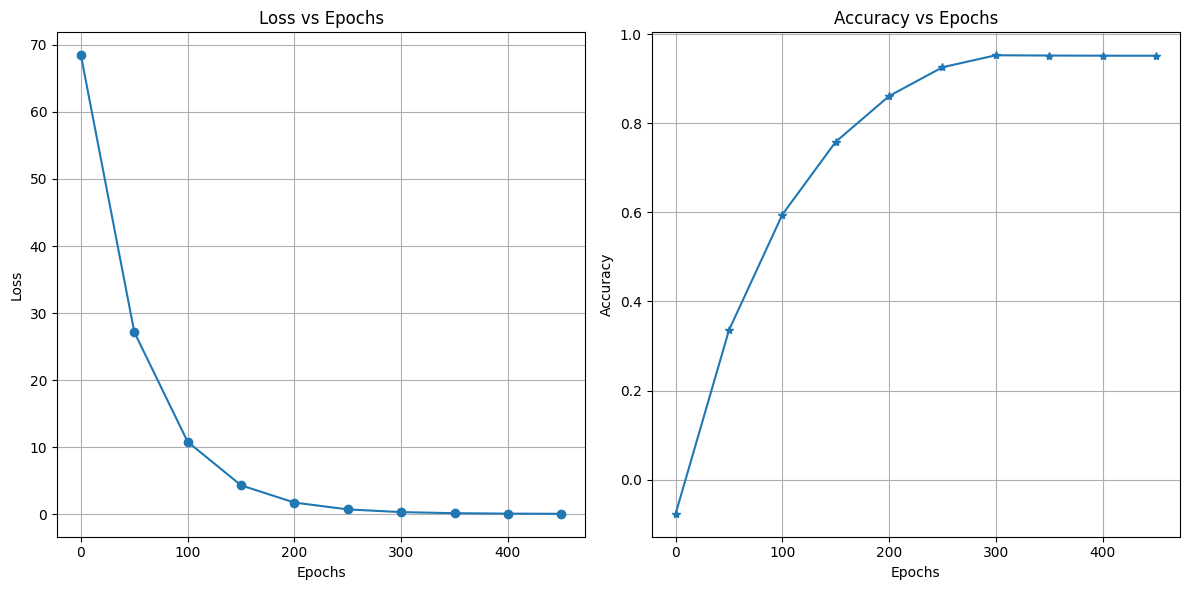

Final Loss: 0.0730
Final Accuracy: 0.9513


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Set up Matplotlib configuration to avoid font and LaTeX errors
matplotlib.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['DejaVu Sans', 'Liberation Sans'],
    'text.usetex': False
})

# Trainable variables (weights & bias)
w = tf.Variable(tf.random.normal([1, 3]), trainable=True, name='weights')
b = tf.Variable(0.1, dtype=tf.float32, trainable=True, name='bias')
noise = tf.constant(np.random.randn(2, 1) * 0.1, dtype=tf.float32)

@tf.function
def model(x):
    return tf.matmul(x, tf.transpose(w)) + b + noise

# Example input and output
x_new = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], dtype=tf.float32)
y_true = tf.constant([[4.0], [10.0]], dtype=tf.float32)

def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Acuracy based on MAPE
def compute_accuracy(y_true, y_pred):
    # This formula directly calculates MAPE, which is a percentage.
    mape = tf.reduce_mean(tf.abs((y_pred - y_true) / y_true))
    # Return accuracy as 1 - MAPE, scaling the result to a proper range (0-1)
    return 1 - mape

# Training phase
learning_rate = 0.0001
optimizer = tf.optimizers.SGD(learning_rate)
epochs = 500

# Lists to store the loss and accuracy values for plotting
loss_values = []
accuracy_values = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = model(x_new)
        loss = compute_loss(y_true, y_pred)

    gradients = tape.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(gradients, [w, b]))

    if epoch % 50 == 0:
        accuracy = compute_accuracy(y_true, y_pred)
        loss_values.append(loss.numpy())
        accuracy_values.append(accuracy.numpy())
        print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}, Accuracy: {accuracy.numpy():.4f}")

# Plotting the loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(0, epochs, 50), loss_values, marker='o')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)

# Plotting the accuracy values
plt.subplot(1, 2, 2)
plt.plot(range(0, epochs, 50), accuracy_values, marker='*')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

# Final loss after training
final_y_pred = model(x_new)
final_loss = compute_loss(y_true, final_y_pred)
final_accuracy = compute_accuracy(y_true, final_y_pred)

print(f"Final Loss: {final_loss.numpy():.4f}")
print(f"Final Accuracy: {final_accuracy.numpy():.4f}")

### $5^{th}$ Example: Logistic Regression

Here, the linear component $f(x_i) = w^Tx_i +b$ is the input of a nonlinear function called the logistic
function described as

$P_r\left(y_i=1|x_i\right) = \frac{1}{1+ e^{wx_i +b}}$

We then regard these values as probabilities from which binary yes/1 or no/0 outcomes are generated. This is the nondeterministic (noisy) part of the model.
The logistic function is more general, and can be used with a different set of parameters for the steepness of the curve and its maximum value. This special case of a logistic function we are using is also referred to as a sigmoid function.

Epoch 0, Loss: [0.7750864 1.513295 ], Accuracy: 0.4031258821487427
Epoch 20, Loss: [0.6296033  0.56392443], Accuracy: 0.7614659667015076
Epoch 40, Loss: [0.6117768  0.39521152], Accuracy: 0.904144287109375
Epoch 60, Loss: [0.6112315  0.35365897], Accuracy: 0.9431867599487305
Epoch 80, Loss: [0.6129198 0.3395338], Accuracy: 0.9468964338302612
Epoch 100, Loss: [0.61448985 0.3336885 ], Accuracy: 0.9484834671020508
Epoch 120, Loss: [0.61561793 0.33092874], Accuracy: 0.9493215084075928
Epoch 140, Loss: [0.61635906 0.32949516], Accuracy: 0.9498632550239563
Epoch 160, Loss: [0.61681986 0.32869476], Accuracy: 0.9502765536308289
Epoch 180, Loss: [0.61709034 0.32822207], Accuracy: 0.9506298899650574
Epoch 200, Loss: [0.6172356  0.32792976], Accuracy: 0.95095294713974
Epoch 220, Loss: [0.6172997 0.3277414], Accuracy: 0.9512595534324646
Epoch 240, Loss: [0.61731184 0.32761502], Accuracy: 0.9515565037727356
Epoch 260, Loss: [0.61729103 0.3275264 ], Accuracy: 0.9518475532531738
Epoch 280, Loss: [0.6

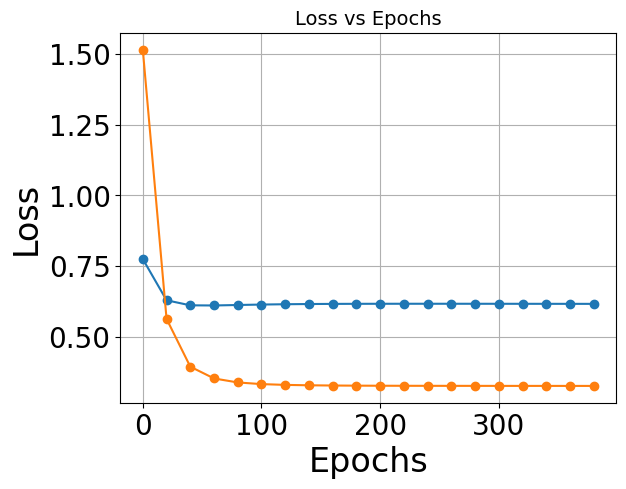

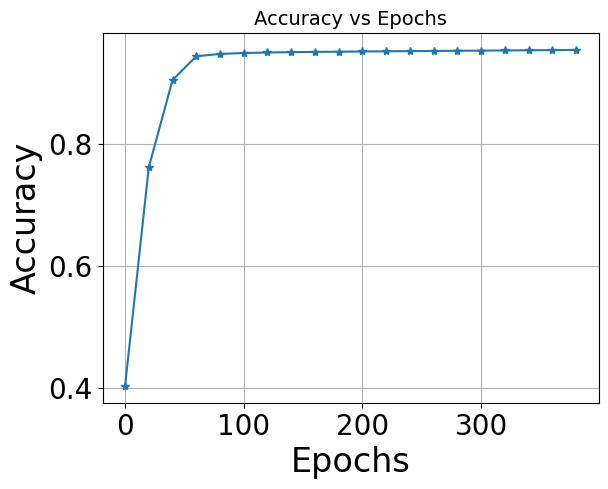

Final Loss: [0.61685675 0.32724935]
Final Accuracy: 0.9537922143936157


In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
# Matplotlib Configuration
matplotlib.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['DejaVu Sans', 'Liberation Sans'],
    'text.usetex': False
})

# Trainable variables (weights & bias)
w = tf.Variable(tf.random.normal([1, 3]), trainable=True,name='weights')
b = tf.Variable(0.1, dtype=tf.float32, trainable=True, name='bias')
noise = np.random.randn(2, 1) * 0.1  # Adjust noise to match shape

@tf.function
def sigmoid(x):
    return 1 / (1 + tf.math.exp(-x))

@tf.function
def model(x):
    logits = tf.matmul(x, tf.transpose(w)) + b  + noise # Keep raw logits
    return tf.sigmoid(logits)


# Example: Providing `x` dynamically
x_new = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], dtype=tf.float32)  # Dynamic input
y_true = tf.constant([[0.7], [0.9]]) #y_i is now a probability bounded in [0,1] and I have 2 outputs in my neural network
y_pred = model(x_new)


# ✅ Fix loss function: Use Binary Cross-Entropy with probabilities
def compute_loss(y_true, y_pred):
    return tf.keras.losses.binary_crossentropy(y_true, y_pred)  # Proper BCE loss


def compute_accuracy(y_true, y_pred):
    abs_percentage_error = tf.abs((y_pred - y_true) / y_true)  # Absolute percentage error
    mape = tf.reduce_mean(abs_percentage_error)  # Compute mean
    accuracy = 1 - mape # accuracy based on MAPE
    return tf.clip_by_value(accuracy, 0, 1)


#Training phase
learning_rate = 0.002 # The learning rate should be bigger for strong nonlinearities
optimizer = tf.optimizers.SGD(learning_rate)

# Training phase (multiple steps)
epochs = 400  # Number of training steps is lesser if the learning rate is bigger

# List to store the loss values for plotting
loss_values = []
accuracy_values = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Record operations for gradient computation
        y_pred = model(x_new)  # Forward pass: model prediction
        loss = compute_loss(y_true, y_pred)  # Compute the loss
        accuracy = compute_accuracy(y_true, y_pred)  # Compute the loss

    # Compute gradients using the tape
    gradients = tape.gradient(loss, [w, b])

    # Apply gradients to update variables
    optimizer.apply_gradients(zip(gradients, [w, b]))
    if epoch % 20 == 0:  # Print every 20 epochs
            loss_values.append(loss.numpy())
            accuracy_values.append(accuracy.numpy())
            print(f"Epoch {epoch}, Loss: {loss.numpy()}, Accuracy: {accuracy.numpy()}")

# Plotting the loss values
plt.plot(range(0, epochs, 20), loss_values, marker='o')
plt.title("Loss vs Epochs", fontsize=14)
plt.xlabel("Epochs", fontsize=24)
plt.ylabel("Loss", fontsize=24)
plt.tick_params(axis='y', labelsize=20)  # Same font size for y-axis ticks
plt.tick_params(axis='x', labelsize=20)  # Same font size for x-axis ticks
plt.grid(True)
plt.show()


# Plotting the loss values
plt.plot(range(0, epochs, 20), accuracy_values, marker='*')
plt.title("Accuracy vs Epochs", fontsize=14)
plt.xlabel("Epochs", fontsize=24)
plt.ylabel("Accuracy", fontsize=24)
plt.tick_params(axis='y', labelsize=20)  # Same font size for y-axis ticks
plt.tick_params(axis='x', labelsize=20)  # Same font size for x-axis ticks
plt.grid(True)
plt.show()

# Final loss after training
print(f"Final Loss: {loss.numpy()}")
# Final accuracy after training
print(f"Final Accuracy: {accuracy.numpy()}")


## 🔎 How to Choose the Best Loss Function?

The best loss function depends on **your problem type** and **the output of your model**. Here's a breakdown:

### 📌 1. What Type of Problem Are You Solving?

#### (A) Classification (Predicting Categories or Probabilities)

| Problem Type | Model Output | Best Loss Function |
|-------------|-------------|--------------------|
| **Binary Classification** (e.g., spam/not spam) | Probability (0 to 1) | `binary_crossentropy` |
| **Multi-Class Classification** (e.g., dog/cat/rabbit) | Probabilities for each class | `categorical_crossentropy` |
| **Multi-Class (One Label at a Time)** | Logits (Raw Scores) | `sparse_categorical_crossentropy` |

💡 **Example:** If you're predicting a probability (like in your sigmoid model), use **Binary Cross-Entropy (`binary_crossentropy`)**.

---

#### (B) Regression (Predicting Continuous Numbers)

| Problem Type | Model Output | Best Loss Function |
|-------------|-------------|--------------------|
| **Predicting Any Real Number** | Continuous Value | `mean_squared_error (MSE)` |
| **Predicting Close to Zero Differences** | Continuous Value | `mean_absolute_error (MAE)` |
| **Handling Outliers Well** | Continuous Value | `huber_loss` or `log_cosh` |

💡 **Example:** If you are predicting a number (not a probability), use **MSE for smooth errors** or **MAE for robust errors**.

---

### 📌 2. Does Your Model Output Logits or Probabilities?

- **If using `softmax()` or `sigmoid()`, use BCE or Categorical Cross-Entropy.**
- **If using raw logits, use `sigmoid_cross_entropy_with_logits()` or `categorical_crossentropy(from_logits=True)`.**

---

### 🔴 🚨 Common Mistake:
If you use `sigmoid()` **inside** your model and then apply `sigmoid_cross_entropy_with_logits()`, you **double apply sigmoid** and mess up learning. Instead:

✅ **Use `binary_crossentropy()` for probabilities.**  
✅ **Use `sigmoid_cross_entropy_with_logits()` only for raw logits.**

<style>
  div {
    font-size: 10pt;
  }
</style>


## What is Convolutional Neural Networks ?

The fundamental difference between fully connected and convolutional neural net‐
works is the pattern of connections between consecutive layers. In the fully connected
case, as the name might suggest, each unit is connected to all of the units in the previous layer.

In the first MNIST example all 10 outputs are connected to all 784 pixels input in a 1D manner. In a convolutional layer of a neural network, on the other hand, each unit is connec‐
ted to a (typically small) number of nearby units in the previous layer. Furthermore,
all units are connected to the previous layer in the same way, with the exact same
weights and structure. Graphically the differnce is illustrated in the figure below.

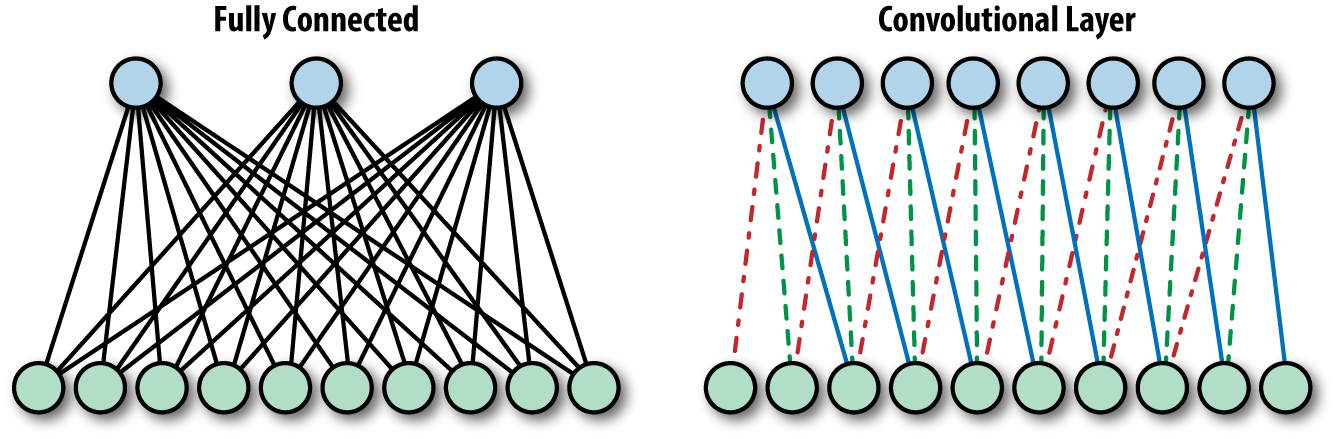

In [ ]:
Image('/content/gdrive/MyDrive/TF_Project/CNN_FullyConnected.png', width=700)

There are motivations commonly cited as leading to the CNN approach, coming
from different schools of thought. The first angle is the so-called neuroscientific
inspiration behind the model. The second deals with insight into the nature of
images, and the third relates to learning theory.

The Nobel Prize–winning neurophysiologists Hubel and Wiesel discovered as early as
the 1960s that the first stages of visual processing in the brain consist of application of
the same local filter (e.g., edge detectors) to all parts of the visual field. The current
understanding in the neuroscientific community is that as visual processing proceeds,
information is integrated from increasingly wider parts of the input, and this is done
hierarchically.

Convolutional neural networks follow the same pattern. Each convolutional layer
looks at an increasingly larger part of the image as we go deeper into the network.
Most commonly, this will be followed by fully connected layers that in the biologically
inspired analogy act as the higher levels of visual processing dealing with global
information.

From my point of view, there is an argument on second angle and thus pattern recoginition is better treated by CNN. the neuroscientific inspiration is probably not true if we consider the literature of spiking neural networks (SNN). Understanding the argument from Hope the neuroscientific inspiration is not a brain like approach, but more deeply how eye detects patterns. Thus, both first and second angles compleate themselves. In this view, a
convolutional neural network layer computes the same features of an image, across
all spatial areas. It can be seen as a regularization mechanism. Convolutional layers are often combined to fully connected ones to describe an architecture of neural network.

The convolution operation is the fundamental means by which layers are connected in convolutional neural networks. It is performed in Tensorflow by
```python
tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
```
where x is the data—the input image, , or a downstream feature map obtained further
along in the network, after applying previous convolution layers.

## Activation Functions

Following linear layers, whether convolutional or fully connected,
it is common practice to apply nonlinear activation functions. One practical aspect of activation
functions is that consecutive linear operations can be replaced by a
single one, and thus depth doesn’t contribute to the expressiveness
of the model unless we use nonlinear activations between the linear
layers. In other words, linear layers could be represented by a single layer like in the second example.
Typical nonlinear activation functions are illustrated in the figure below.


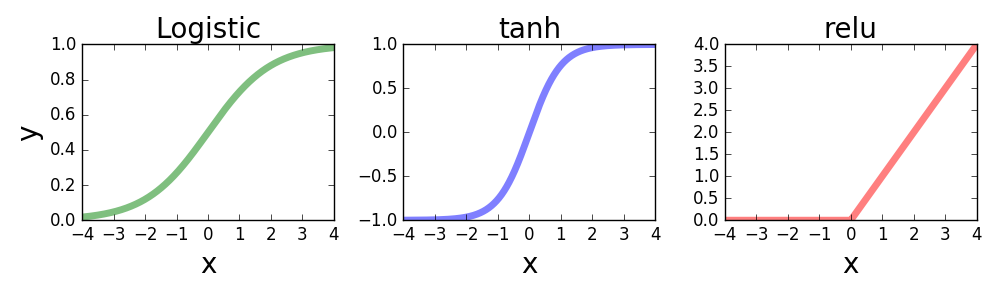

In [ ]:
Image('/content/gdrive/MyDrive/TF_Project/nonlinear_activation_functions.png', width=800)

## Pooling
It is common to follow convolutional layers with pooling of outputs. Technically,
pooling means reducing the size of the data with some local aggregation function, typ‐
ically within each feature map. The pooling reduces the size of the data to be processed downstream. This
can drastically reduce the number of overall parameters in the model, especially if we
use fully connected layers after the convolutional ones. Second reason is to compute
features (patterns) not to care about small changes in position in an image. It is performed in Tensorflow by
```python
tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
```
where the predefined size is (2x2) controlled by ```ksize``` argument, while ```strides``` controls by how much we “slide” the pooling grids.

## Dropout
Dropout is a regularization trick
used in order to force the network to distribute the learned representation across all
the neurons. This process is often thought of as training an
“ensemble” of multiple networks, thereby increasing generalization. It is performed in Tensorflow by
```python
tf.nn.dropout(layer, keep_prob=keep_prob)
```
In order to be able to change ```keep_prob``` and control the dropout, we will use a tf.Variable and pass
one value for train (.5) and another for test (1.0).

### $6^{th}$ Example: MNIST Take II

In [2]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers, models
from callbackPlots import AccuracyPlotCallback
from callbackPlots import count_neurons_and_synapses

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    #This specifies the convolution we will typically use. A full convolution (no skips) with an output the same size as the input.
    #This function is used in the convolutional layer above
    layers.Conv2D(64, (5, 5), activation='relu', padding='same'),

    #This sets the max pool to half the size across the height/width dimensions, and in total a quarter the size of the feature map.
    #Execute the Pooling between convolutional layers to reduce the size of the data
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    #This is the actual layer we will use. Linear convolution as defined in conv2d, with a bias, followed by the ReLU nonlinearity.
    layers.Dense(1024, activation='relu'),

    layers.Dropout(0.3),  # Dropout to prevent overfitting
    layers.Dense(10, activation='softmax')  # Softmax for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])  # Explicitly add metrics

# Model summary
model.summary()

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images to [0,1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to add channel dimension (28,28,1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(f"Training set shape: {x_train.shape}, Test set shape: {x_test.shape}")

# Create the callback instance
plot_callback = AccuracyPlotCallback()

# Debugging: Print if the callback is created correctly
print(f"Callback created: {plot_callback}")

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), callbacks=[plot_callback])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Call the function
count_neurons_and_synapses(model)


ModuleNotFoundError: No module named 'callbackPlots'

## CIFAR10
CIFAR10 is another dataset with a long history in computer vision and machine
learning. Like MNIST, it is a common benchmark that various methods are tested
against. CIFAR10 is a set of 60,000 color images of size 32×32 pixels, each belonging
to one of ten categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship,
and truck.

State-of-the-art deep learning methods for this dataset are as good as humans at classifying these images. In this section we start off with much simpler methods that will
run relatively quickly. Then, we discuss briefly what the gap is between these and the
state of the art.

Proposed neural network model consists of three blocks of convolutional layers, followed by the fully connected and output layers we have already seen a few times before. Each block of convolutional layers contains three consecutive convolutional layers, followed by a single pooling and dropout. This model is still compact
and fast, and achieves approximately 83% accuracy after ~15 epochs. However, there is some overfitting as this accuracy is not found during testing phase.


### $7^{th}$ Example

# ***Please restart the Jupyter notebook to clean the used memory and run only this example after that.***

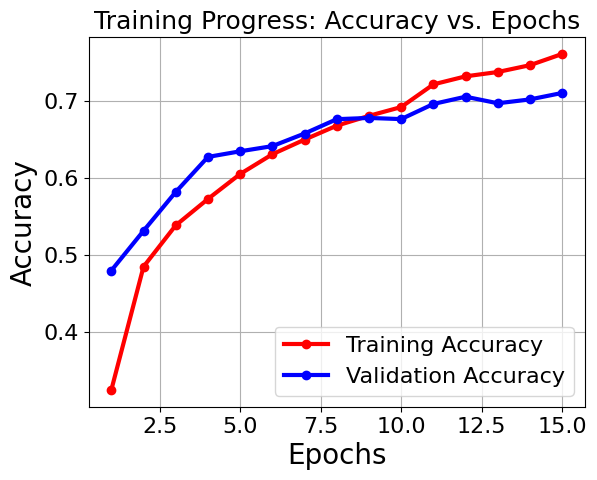

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7612 - loss: 0.6851 - val_accuracy: 0.7099 - val_loss: 0.8508 - learning_rate: 2.5000e-04
313/313 - 1s - 4ms/step - accuracy: 0.7050 - loss: 0.8497

Test accuracy: 0.7050

--- Model Summary (Neurons and Synapses) ---
Layer: dense (Dense), Parameters: 40500, Neurons: 500, Weights: 40000, Bias: 500, Calculated Synapses (Weights + Bias): 40500
Layer: dense_1 (Dense), Parameters: 5010, Neurons: 10, Weights: 5000, Bias: 10, Calculated Synapses (Weights + Bias): 5010

Total Neurons (approx, mainly from Dense/RNN): 510
Total Synapses (Total Trainable Parameters): 45510


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from callbackPlots import AccuracyPlotCallback
from callbackPlots import count_neurons_and_synapses

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Create the ImageDataGenerator instance
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator on the training data
datagen.fit(x_train)

# Define the model using the Sequential API
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(30, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Layer
    layers.Conv2D(50, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Third Convolutional Layer
    layers.Conv2D(80, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(8, 8)),

    # Flatten the output from the convolutional layers
    layers.Flatten(),

    # Fully Connected Layer
    layers.Dense(500, activation='relu'),

    # Dropout layer to reduce overfitting
    layers.Dropout(0.8),

    # Output layer with softmax activation
    layers.Dense(10, activation='softmax')
])

# Define the Adam optimizer with an explicit learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=1.0e-6)  # Adjust this value as needed

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary to check architecture
model.summary()

# Create the callback instance
plot_callback = AccuracyPlotCallback()

# Debugging: Print if the callback is created correctly
print(f"Callback created: {plot_callback}")

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test),
                    callbacks=[plot_callback, early_stopping, reduce_lr])
#history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), callbacks=[plot_callback])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")
# Save the model in Keras format (.keras)
model_filename = f"model_Accu{test_acc:.4f}.keras"
model.save(model_filename)

# Call the function
count_neurons_and_synapses(model)

## Recurrent Neural Networks

It is powerful class of deep learning algorithms particularly useful and popular in natural language processing. Besides, RNN is an immensely important and useful type of neural network to process sequential structures. The type of data with strong sequential structure is natural language. That's why RNN is often employed in a supervised text classification
problem with word-embedding training.

The basic idea behind RNN models is that each new element in the sequence contributes some new information, which updates
the current state of the model. A fundamental mathematical construct in statistics and probability, which is often
used as a building block for modeling sequential patterns via machine learning is the
Markov chain model. RNN applies some form of “loop” to deal with such sequency of information. This is very related to the Markov chain models discussed previously and their
hidden Markov model (HMM) extensions, which are not discussed here.

The update step for our simple vanilla RNN is

$h_t = tanh(W_x x_t + W_h h_{t-1} + b)$

where $W_h$, $W_x$, and $b$ are weight and bias variables we learn, $tanh(·)$ is the hyperbolic
tangent function.

While the structure of natural images is
well suited for CNN models, it is revealing to look at the structure of images from
different angles. In a trend in cutting-edge deep learning research, advanced models
attempt to exploit various kinds of sequential structures in images, trying to capture
in some sense the “generative process” that created each image. Intuitively, this all
comes down to the notion that nearby areas in images are somehow related, and trying to model this structure. We assume that the last state vector has “accumulated” information representing the entire sequence.

Following example builds a vanilla RNN example. The model we defined is composed of two main layers:
1. **VanillaRNNLayer**  
   - A custom layer that processes the input sequence over 28 time steps.
   - For each time step, it updates a hidden state of size 128 using the recurrence:
    
    $h_t = tanh(W_x x_t + W_h h_{t-1} + b)$

    where:
    - $W_h$ (hidden-to-hidden weights) has a shape of \([128, 128]\).
    - $W_x$ (input-to-hidden weights) maps the input vector (of size 28) to a hidden state vector of size **128**.
    - $b$ is the bias term.

   - This layer encapsulates the recurrent processing logic using the parameters:
     - `element_size` (input dimension per time step)
     - `time_steps` (length of the sequence)
     - `hidden_layer_size` (size of the hidden state)

2. **Dense Layer**  
   - A fully connected layer that takes the final hidden state (size 128) as input.
   - It produces **num_classes = 10** logits for classification.



The **VanillaRNNLayer** is designed with a hidden state of size **128** (`hidden_layer_size = 128`). This means that at every time step, the hidden state vector \( h_t \) has **128 values**. Each value represents a neuron in the recurrent layer. Because the hidden state $h_t$ is of size **128**, this confirms that the recurrent layer effectively contains **128 neurons**.

Thus, the recurrent layer in your model indeed has **128 neurons**. This layer is followed by a fully connected layer of **10 neurons**, which produces the **10** output logits required for a MNIST classification.



### $8^{th}$ Example MNIST classification using a vanilla RNN

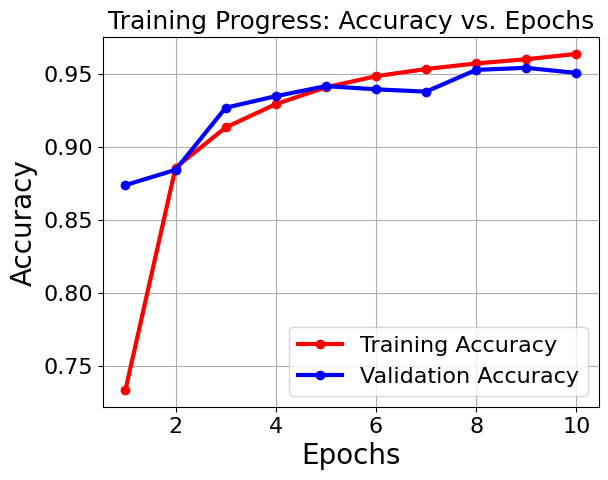

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9636 - loss: 0.1300 - val_accuracy: 0.9505 - val_loss: 0.1744
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9409 - loss: 0.2001

Test Accuracy: 0.9505


Model: "vanilla_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vanilla_rnn_layer               │ ?                      │        20,096 │
│ (VanillaRNNLayer)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,160 (250.63 KB)

 Trainable params: 21,386 (83.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42,774 (167.09 KB)

In [7]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from callbackPlots import AccuracyPlotCallback

# Parameters
element_size = 28
time_steps = 28
num_classes = 10
batch_size = 128
hidden_layer_size = 128

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape dataset for RNNs
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, time_steps, element_size)
x_test = x_test.reshape(-1, time_steps, element_size)

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Create dataset batches
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)


# Define a custom vanilla RNN model using subclassing
class VanillaRNNLayer(tf.keras.layers.Layer):
    def __init__(self, hidden_layer_size, **kwargs):
        super(VanillaRNNLayer, self).__init__(**kwargs)
        self.hidden_layer_size = hidden_layer_size

    def build(self, input_shape):
        element_size = input_shape[-1]
        self.Wx = self.add_weight(name="Wx", shape=(element_size, self.hidden_layer_size),
                                 initializer='random_normal', trainable=True)
        self.Wh = self.add_weight(name="Wh", shape=(self.hidden_layer_size, self.hidden_layer_size),
                                 initializer='random_normal', trainable=True)
        self.b_rnn = self.add_weight(name="b_rnn", shape=(self.hidden_layer_size,),
                                     initializer='zeros', trainable=True)
        super(VanillaRNNLayer, self).build(input_shape)

    def call(self, inputs):
        # Usamos tf.shape(inputs) para obter o tamanho do lote dinamicamente
        batch_size = tf.shape(inputs)[0]

        # Corrigido: Usamos a constante estática (time_steps=28) para o loop Python
        # Para garantir que funcione no Modo Gráfico, é mais seguro iterar sobre um valor fixo
        time_steps_static = inputs.shape[1]

        hidden_state = tf.zeros([batch_size, self.hidden_layer_size])

        # O loop agora usa um valor que o Python pode iterar (a dimensão estática da forma)
        for t in range(time_steps_static):
            x_t = inputs[:, t, :]
            hidden_state = tf.tanh(
                tf.matmul(hidden_state, self.Wh) +
                tf.matmul(x_t, self.Wx) +
                self.b_rnn
            )

        return hidden_state

class VanillaRNN(tf.keras.Model):
    def __init__(self, hidden_layer_size, num_classes, **kwargs):
        super(VanillaRNN, self).__init__(**kwargs)
        self.rnn_layer = VanillaRNNLayer(hidden_layer_size)
        self.dense = tf.keras.layers.Dense(num_classes)  # No activation to keep logits

    def call(self, x):
        x = self.rnn_layer(x)
        logits = self.dense(x)
        return logits  # Return unnormalized scores (logits)


# Instantiate the model

vanilla_rnn_model = VanillaRNN(hidden_layer_size=hidden_layer_size, num_classes=num_classes)

# Optionally, build the model to see the summary:
vanilla_rnn_model.build(input_shape=(None, time_steps, element_size))

# Create the callback instance
plot_callback = AccuracyPlotCallback()

# Debugging: Print if the callback is created correctly
print(f"Callback created: {plot_callback}")

# Compile & Train
vanilla_rnn_model.compile(optimizer='adam',
                          loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                          metrics=['accuracy'])

vanilla_rnn_model.fit(train_dataset, epochs=10, validation_data=test_dataset, callbacks=[plot_callback])

# Evaluate the model on the test set
test_loss, test_acc = vanilla_rnn_model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

vanilla_rnn_model.summary()


### $9^{th}$ Example MNIST classification Simple RNN from Keras

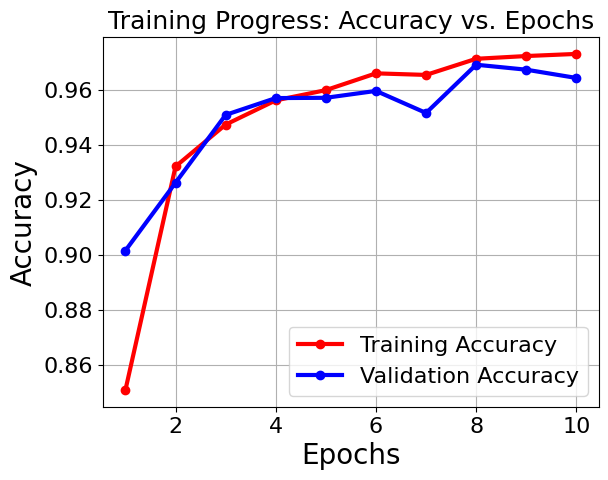

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9730 - loss: 0.0938 - val_accuracy: 0.9642 - val_loss: 0.1212
313/313 - 2s - 6ms/step - accuracy: 0.9642 - loss: 0.1212

Test accuracy: 0.9642


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        20,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,160 (250.63 KB)

 Trainable params: 21,386 (83.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42,774 (167.09 KB)

In [8]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers, models
from callbackPlots import AccuracyPlotCallback
from callbackPlots import count_neurons_and_synapses

# Define some parameters
element_size = 28
time_steps = 28
num_classes = 10
batch_size = 128
hidden_layer_size = 128

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images to [0,1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the dataset for RNNs
x_train = x_train.reshape(-1, time_steps, element_size)  # (batch, 28, 28)
x_test = x_test.reshape(-1, time_steps, element_size)


# Convert labels to categorical (if needed)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Create TensorFlow dataset for batching
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

# Define the model
model = models.Sequential([
    layers.SimpleRNN(hidden_layer_size, activation="tanh", input_shape=(time_steps, element_size)),
    layers.Dense(num_classes, activation="softmax")  # Fully connected output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],)  # Explicitly add metrics

# Create the callback instance
plot_callback = AccuracyPlotCallback()

# Debugging: Print if the callback is created correctly
print(f"Callback created: {plot_callback}")

# Train the model
model.fit(train_dataset, epochs=10, validation_data=test_dataset,callbacks=[plot_callback])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")
# Save the model in Keras format (.keras)
model_filename = f"model_Accu{test_acc:.4f}.keras"
model.save(model_filename)

# Model summary
model.summary()